# Validity of using prescription records to identify patient comorbidities
## Analysis of combined osteoporosis and osteopenia

**ReadMe:**
- This is a script used in the analysis for Schnier et al., 2025: Validity of using prescription records to classify disease – a record linkage study using routinely collected electronic health records from the UK.
- The underlying data set has been created using the Optimum Patient Care Research Database (https://opcrd.optimumpatientcare.org/). The authors do not have permission to give the public access to the study dataset; researchers may request access to OPCRD for their own purposes. 
 - All code is run in StataSE 18. 


**Set up:**
|Var|Input|
| --- | --- | 
|population|425,000|
|diagnostic codes|OpenCodelist (Snomed) and HDRUK (read)|
|drug codes|bnf 06.06.01 and 06.06.02|
|sql date|13.03.2025|
|sql code|opopselection20250313.sql| 

In [1]:
    clear all

### Import from SQL server and data wrangling

In [2]:
odbc load, exec("select * from [opop_425000_20250313]") dsn("sqlserverconnect")

In [3]:
generate test=0 if missing(drug_dt)
replace test=1 if ! missing(drug_dt)  

generate diag=0 if missing(diag_dt)
replace diag=1 if ! missing(diag_dt)  

gen start_year=year(fu_start_dt)


egen agecat = cut(age), at(16,30,70,120)
label def agecat_lab 16 "Young" 30 "0Middle" 70 "Elderly" 120 "weird"
label values agecat agecat_lab


egen yearcat = cut(start_year), at(2004,2010,2016,2025)
label def yearcat_lab 2004 "2004-2009" 2010 "2010-2015" 2016 "2016-2020" 
label values yearcat yearcat_lab

egen imdcat = cut(imd_decile), at(0,4,8,11)
label def imdcat_lab 0 "1-3" 4 "4-7" 8 "8-10" 
label values imdcat imdcat_lab


replace bnf_code = "Calcitonins and parathyroid hormone" if bnf_code== "060601"
replace bnf_code = "Bisphosphonates" if bnf_code== "060602"
replace bnf_code = "Calcium supplements" if bnf_code== "090501"
replace bnf_code = "Vitamine D" if bnf_code== "090604"
replace bnf_code = "Other/unknown" if missing(bnf_code) & ! missing(drug_dt)




replace ethnicity="0white" if ethnicity=="1"
replace ethnicity="Other" if ethnicity=="2"
replace ethnicity="Other" if ethnicity=="3"
replace ethnicity="Other" if ethnicity=="4"
replace ethnicity="Other" if ethnicity=="5"
replace ethnicity="Missing" if ethnicity=="99"




encode bnf_code, generate(bnf_code_values) 
encode description, generate(description_values)
encode ethnicity, generate(ethnicity_values) 

gen diag_neg=diag==0
gen diag_pos=diag==1
encode region_name, generate(region) label(regionlbl)
encode ethnicity, generate(ethnic)

(41,372 missing values generated)
(41,372 real changes made)
(6,736 missing values generated)
(6,736 real changes made)
(2,589 missing values generated)
variable bnf_code was str6 now str35
(5 real changes made)
(8,907 real changes made)
(1 real change made)
(32,430 real changes made)
(23 real changes made)
variable ethnicity was str2 now str6
(257,981 real changes made)
(3,762 real changes made)
(23,912 real changes made)
(7,430 real changes made)
(8,764 real changes made)
variable ethnicity was str6 now str7
(123,151 real changes made)


(bin=19, start=16, width=5)


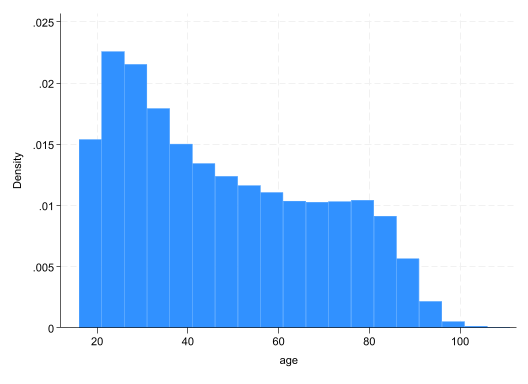

In [4]:
histogram age, width(5)


This table holds one randomly selected diagnostic code found during the observation period. The table is truncated to only include diagnostic codes with a count of 10 or more.

In [5]:
set linesize 132
groups description , select(f >= 10) ord(h) table 


  +-----------------------------------------------------------------------------------+
  |                                             description   Freq.   Percent     %<= |
  |-----------------------------------------------------------------------------------|
  |                                            Osteoporosis    2752     40.86   40.86 |
  |                                   Osteopenia (disorder)    2617     38.85   79.71 |
  |                                              Osteopenia     906     13.45   93.16 |
  |                         Osteoporotic vertebral collapse      88      1.31   94.46 |
  |                                        Osteoporosis NOS      50      0.74   95.20 |
  |-----------------------------------------------------------------------------------|
  |                                  Vertebral osteoporosis      42      0.62   95.83 |
  |                                   Pathological fracture      37      0.55   96.38 |
  |                            

These tables holds one randomly selected prescrption during the observation period. The table is truncated to only include codes with a count of 10 or more.


In [6]:
set linesize 132
groups bnf_code , select(f >= 10) ord(h) table 


  +-------------------------------------------+
  |        bnf_code   Freq.   Percent     %<= |
  |-------------------------------------------|
  |      Vitamine D   32430     78.39   78.39 |
  | Bisphosphonates    8907     21.53   99.92 |
  |   Other/unknown      23      0.06   99.97 |
  +-------------------------------------------+


### Results
#### Overall

In [7]:
diagt diag test


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     5,933        803 |     6,736 
    Normal |    35,439    382,825 |   418,264 
-----------+----------------------+----------
     Total |    41,372    383,628 |   425,000 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.6%      1.5%       1.6%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     88.1%     87.3%     88.8%
Specificity                      Pr(-|N)     91.5%     91.4%     91.6%
ROC area               (Sens. + Spec.)/2      0.90      0.89      0.90 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     10.40     10.

#### Males

In [8]:
diagt diag test if sex==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,067        200 |     1,267 
    Normal |    10,229    196,789 |   207,018 
-----------+----------------------+----------
     Total |    11,296    196,989 |   208,285 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.6%      0.6%       0.6%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     84.2%     82.1%     86.2%
Specificity                      Pr(-|N)     95.1%     95.0%     95.2%
ROC area               (Sens. + Spec.)/2      0.90      0.89      0.91 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     17.04     16.

#### Females

In [9]:
diagt diag test if sex==0


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     4,866        603 |     5,469 
    Normal |    25,207    186,030 |   211,237 
-----------+----------------------+----------
     Total |    30,073    186,633 |   216,706 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      2.5%      2.5%       2.6%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     89.0%     88.1%     89.8%
Specificity                      Pr(-|N)     88.1%     87.9%     88.2%
ROC area               (Sens. + Spec.)/2      0.89      0.88      0.89 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)      7.46      7.

#### Age
*16-30*

In [10]:
diagt diag test if agecat==16


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |        69         26 |        95 
    Normal |     3,170    114,409 |   117,579 
-----------+----------------------+----------
     Total |     3,239    114,435 |   117,674 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.1%      0.1%       0.1%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     72.6%     62.5%     81.3%
Specificity                      Pr(-|N)     97.3%     97.2%     97.4%
ROC area               (Sens. + Spec.)/2      0.85      0.80      0.89 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     26.94     23.

*30-69*

In [11]:
diagt diag test if agecat==30


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     2,022        383 |     2,405 
    Normal |    12,435    206,555 |   218,990 
-----------+----------------------+----------
     Total |    14,457    206,938 |   221,395 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.1%      1.0%       1.1%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     84.1%     82.6%     85.5%
Specificity                      Pr(-|N)     94.3%     94.2%     94.4%
ROC area               (Sens. + Spec.)/2      0.89      0.88      0.90 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     14.81     14.

*>69*

In [12]:
diagt diag test if agecat==70


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     3,842        394 |     4,236 
    Normal |    19,834     61,861 |    81,695 
-----------+----------------------+----------
     Total |    23,676     62,255 |    85,931 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      4.9%      4.8%       5.1%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     90.7%     89.8%     91.6%
Specificity                      Pr(-|N)     75.7%     75.4%     76.0%
ROC area               (Sens. + Spec.)/2      0.83      0.83      0.84 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)      3.74      3.

#### Year at start of oberservation period 
*2004-2009*

In [13]:
diagt diag test if yearcat==2004


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     2,392        241 |     2,633 
    Normal |     9,738    137,629 |   147,367 
-----------+----------------------+----------
     Total |    12,130    137,870 |   150,000 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.8%      1.7%       1.8%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     90.8%     89.7%     91.9%
Specificity                      Pr(-|N)     93.4%     93.3%     93.5%
ROC area               (Sens. + Spec.)/2      0.92      0.92      0.93 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     13.75     13.

*2010-2015*

In [14]:
diagt diag test if yearcat==2010


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     2,012        265 |     2,277 
    Normal |    13,339    134,384 |   147,723 
-----------+----------------------+----------
     Total |    15,351    134,649 |   150,000 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.5%      1.5%       1.6%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     88.4%     87.0%     89.7%
Specificity                      Pr(-|N)     91.0%     90.8%     91.1%
ROC area               (Sens. + Spec.)/2      0.90      0.89      0.90 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)      9.79      9.

*2016-2020*

In [15]:
diagt diag test if yearcat==2016


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,529        297 |     1,826 
    Normal |    12,362    110,812 |   123,174 
-----------+----------------------+----------
     Total |    13,891    111,109 |   125,000 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.5%      1.4%       1.5%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     83.7%     82.0%     85.4%
Specificity                      Pr(-|N)     90.0%     89.8%     90.1%
ROC area               (Sens. + Spec.)/2      0.87      0.86      0.88 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)      8.34      8.

#### IMD of practice
*1-3*

In [16]:
diagt diag test if imdcat==0


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,868        246 |     2,114 
    Normal |    14,597    137,840 |   152,437 
-----------+----------------------+----------
     Total |    16,465    138,086 |   154,551 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.4%      1.3%       1.4%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     88.4%     86.9%     89.7%
Specificity                      Pr(-|N)     90.4%     90.3%     90.6%
ROC area               (Sens. + Spec.)/2      0.89      0.89      0.90 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)      9.23      9.

*4-7*

In [17]:
diagt diag test if imdcat==4


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     2,308        301 |     2,609 
    Normal |    11,568    128,868 |   140,436 
-----------+----------------------+----------
     Total |    13,876    129,169 |   143,045 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.8%      1.8%       1.9%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     88.5%     87.2%     89.7%
Specificity                      Pr(-|N)     91.8%     91.6%     91.9%
ROC area               (Sens. + Spec.)/2      0.90      0.89      0.91 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     10.74     10.

*8-10*

In [18]:
diagt diag test if imdcat==8


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,751        256 |     2,007 
    Normal |     9,181    113,627 |   122,808 
-----------+----------------------+----------
     Total |    10,932    113,883 |   124,815 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.6%      1.5%       1.7%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     87.2%     85.7%     88.7%
Specificity                      Pr(-|N)     92.5%     92.4%     92.7%
ROC area               (Sens. + Spec.)/2      0.90      0.89      0.91 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     11.67     11.

#### Commissioning Regions
EAST OF ENGLAND

In [19]:
diagt diag test if regexm(region_name,"ENGLAND")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,086        159 |     1,245 
    Normal |     6,494     81,898 |    88,392 
-----------+----------------------+----------
     Total |     7,580     82,057 |    89,637 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.4%      1.3%       1.5%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     87.2%     85.2%     89.0%
Specificity                      Pr(-|N)     92.7%     92.5%     92.8%
ROC area               (Sens. + Spec.)/2      0.90      0.89      0.91 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     11.87     11.

London

In [20]:
diagt diag test if regexm(region_name,"LONDON")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       116         20 |       136 
    Normal |     1,195     15,394 |    16,589 
-----------+----------------------+----------
     Total |     1,311     15,414 |    16,725 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.8%      0.7%       1.0%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     85.3%     78.2%     90.8%
Specificity                      Pr(-|N)     92.8%     92.4%     93.2%
ROC area               (Sens. + Spec.)/2      0.89      0.86      0.92 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     11.84     10.

Midlands

In [21]:
diagt diag test if regexm(region_name,"MID")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       717        113 |       830 
    Normal |     4,047     41,666 |    45,713 
-----------+----------------------+----------
     Total |     4,764     41,779 |    46,543 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.8%      1.7%       1.9%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     86.4%     83.9%     88.6%
Specificity                      Pr(-|N)     91.1%     90.9%     91.4%
ROC area               (Sens. + Spec.)/2      0.89      0.88      0.90 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)      9.76      9.

Yorkshire

In [22]:
diagt diag test if regexm(region_name,"YORK")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,277        168 |     1,445 
    Normal |     9,202     75,464 |    84,666 
-----------+----------------------+----------
     Total |    10,479     75,632 |    86,111 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.7%      1.6%       1.8%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     88.4%     86.6%     90.0%
Specificity                      Pr(-|N)     89.1%     88.9%     89.3%
ROC area               (Sens. + Spec.)/2      0.89      0.88      0.90 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)      8.13      7.

North West

In [23]:
diagt diag test if regexm(region_name,"NORTH")==1 & regexm(region_name,"WEST")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       617         66 |       683 
    Normal |     3,927     42,983 |    46,910 
-----------+----------------------+----------
     Total |     4,544     43,049 |    47,593 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.4%      1.3%       1.5%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     90.3%     87.9%     92.4%
Specificity                      Pr(-|N)     91.6%     91.4%     91.9%
ROC area               (Sens. + Spec.)/2      0.91      0.90      0.92 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     10.79     10.

South East

In [24]:
diagt diag test if regexm(region_name,"SOUTH")==1 & regexm(region_name,"EAST")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,373        172 |     1,545 
    Normal |     6,604     82,336 |    88,940 
-----------+----------------------+----------
     Total |     7,977     82,508 |    90,485 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.7%      1.6%       1.8%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     88.9%     87.2%     90.4%
Specificity                      Pr(-|N)     92.6%     92.4%     92.7%
ROC area               (Sens. + Spec.)/2      0.91      0.90      0.92 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     11.97     11.

South West

In [25]:
diagt diag test if regexm(region_name,"SOUTH")==1 & regexm(region_name,"WEST")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       617         86 |       703 
    Normal |     3,314     32,159 |    35,473 
-----------+----------------------+----------
     Total |     3,931     32,245 |    36,176 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.9%      1.8%       2.1%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     87.8%     85.1%     90.1%
Specificity                      Pr(-|N)     90.7%     90.4%     91.0%
ROC area               (Sens. + Spec.)/2      0.89      0.88      0.90 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)      9.39      9.

#### System
SystmOne

In [26]:
diagt diag test if regexm(system,"One")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     3,104        435 |     3,539 
    Normal |    20,991    204,225 |   225,216 
-----------+----------------------+----------
     Total |    24,095    204,660 |   228,755 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.5%      1.5%       1.6%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     87.7%     86.6%     88.8%
Specificity                      Pr(-|N)     90.7%     90.6%     90.8%
ROC area               (Sens. + Spec.)/2      0.89      0.89      0.90 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)      9.41      9.

Vision

In [27]:
diagt diag test if regexm(system,"Vision")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       158         23 |       181 
    Normal |       840     12,723 |    13,563 
-----------+----------------------+----------
     Total |       998     12,746 |    13,744 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.3%      1.1%       1.5%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     87.3%     81.5%     91.8%
Specificity                      Pr(-|N)     93.8%     93.4%     94.2%
ROC area               (Sens. + Spec.)/2      0.91      0.88      0.93 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     14.09     12.

EMIS

In [28]:
diagt diag test if regexm(ustrupper(system),"EMIS")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     2,670        345 |     3,015 
    Normal |    13,593    165,757 |   179,350 
-----------+----------------------+----------
     Total |    16,263    166,102 |   182,365 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.7%      1.6%       1.7%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     88.6%     87.4%     89.7%
Specificity                      Pr(-|N)     92.4%     92.3%     92.5%
ROC area               (Sens. + Spec.)/2      0.90      0.90      0.91 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     11.68     11.

#### RA_Index
Index==1

In [29]:
diagt diag test if RA_index==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     4,658        617 |     5,275 
    Normal |    27,533    288,889 |   316,422 
-----------+----------------------+----------
     Total |    32,191    289,506 |   321,697 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.6%      1.6%       1.7%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     88.3%     87.4%     89.2%
Specificity                      Pr(-|N)     91.3%     91.2%     91.4%
ROC area               (Sens. + Spec.)/2      0.90      0.89      0.90 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     10.15     10.

Index==0

In [30]:
diagt diag test if RA_index==0


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,275        186 |     1,461 
    Normal |     7,906     93,936 |   101,842 
-----------+----------------------+----------
     Total |     9,181     94,122 |   103,303 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.4%      1.3%       1.5%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     87.3%     85.5%     88.9%
Specificity                      Pr(-|N)     92.2%     92.1%     92.4%
ROC area               (Sens. + Spec.)/2      0.90      0.89      0.91 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     11.24     10.

#### Ethnicity
Ethnicity==0000white

In [31]:
diagt diag test if ethnicity=="0white"


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     4,259        615 |     4,874 
    Normal |    23,002    230,105 |   253,107 
-----------+----------------------+----------
     Total |    27,261    230,720 |   257,981 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.9%      1.8%       1.9%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     87.4%     86.4%     88.3%
Specificity                      Pr(-|N)     90.9%     90.8%     91.0%
ROC area               (Sens. + Spec.)/2      0.89      0.89      0.90 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)      9.62      9.

In [32]:
diagt diag test if ethnicity=="Other"


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       265         25 |       290 
    Normal |     5,420     38,158 |    43,578 
-----------+----------------------+----------
     Total |     5,685     38,183 |    43,868 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.7%      0.6%       0.7%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     91.4%     87.5%     94.3%
Specificity                      Pr(-|N)     87.6%     87.2%     87.9%
ROC area               (Sens. + Spec.)/2      0.89      0.88      0.91 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)      7.35      7.

In [33]:
diagt diag test if ethnicity=="Missing"


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,409        163 |     1,572 
    Normal |     7,017    114,562 |   121,579 
-----------+----------------------+----------
     Total |     8,426    114,725 |   123,151 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.3%      1.2%       1.3%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     89.6%     88.0%     91.1%
Specificity                      Pr(-|N)     94.2%     94.1%     94.4%
ROC area               (Sens. + Spec.)/2      0.92      0.91      0.93 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     15.53     15.

In [34]:
tempname memhold
postfile `memhold' str20 var prev sens spec ppv npv roc using "validity.dta",replace

quietly diagt diag test
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("all") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if sex==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Male") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if sex==0
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Female") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if agecat==16
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Age young") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if agecat==30
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Age middle") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if agecat==70
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Age elderly") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 


quietly diagt diag test if yearcat==2004
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Year 2004-2009") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if yearcat==2010
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Year 2010-2015") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc')

quietly diagt diag test if yearcat==2016
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Year 2016-2020") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 


quietly diagt diag test if imdcat==0
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("IMD 1,3") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if imdcat==4
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("IMD 4,7") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if imdcat==8
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("IMD 8,10") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 


quietly diagt diag test if regexm(region_name,"LONDON")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("London") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"MID")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Midlands") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"YORK")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Yorkshire") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"NORTH")==1 & regexm(region_name,"WEST")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("North West") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"SOUTH")==1 & regexm(region_name,"EAST")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("South East") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"SOUTH")==1 & regexm(region_name,"WEST")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("South West") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(system,"One")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("SystemOne") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(system,"Vision")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Vision") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(ustrupper(system),"EMIS")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("EMIS") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if RA_index==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("RAIndex1") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if RA_index==0
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("RAIndex0") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if ethnicity=="0white"
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Ethnicity_0white") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if ethnicity=="Other"
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Ethnicity_Other") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 



quietly diagt diag test if ethnicity=="Missing"
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Ethnicity_Missing") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

postclose `memhold'

### Logistic Regression
#### PPV

In [35]:
drop if missing(imdcat)
drop if missing(sex)

(2,589 observations deleted)
(9 observations deleted)


In [36]:
logistic diag_pos if test==1


Logistic regression                                     Number of obs = 41,270
                                                        LR chi2(0)    =   0.00
                                                        Prob > chi2   =      .
Log likelihood = -16981.46                              Pseudo R2     = 0.0000

------------------------------------------------------------------------------
    diag_pos |       Odds   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       _cons |   .1676994   .0023539  -127.21   0.000     .1631488    .1723769
------------------------------------------------------------------------------


In [37]:
logistic diag_pos i.bnf_code_values if test==1

note: 1.bnf_code_values != 0 predicts success perfectly;
      1.bnf_code_values omitted and 2 obs not used.

note: 2.bnf_code_values != 0 predicts failure perfectly;
      2.bnf_code_values omitted and 1 obs not used.

note: 3.bnf_code_values != 0 predicts failure perfectly;
      3.bnf_code_values omitted and 1 obs not used.

note: 4.bnf_code_values != 0 predicts failure perfectly;
      4.bnf_code_values omitted and 1 obs not used.

note: 5.bnf_code_values != 0 predicts failure perfectly;
      5.bnf_code_values omitted and 1 obs not used.

note: 8.bnf_code_values != 0 predicts failure perfectly;
      8.bnf_code_values omitted and 1 obs not used.

note: 10.bnf_code_values omitted because of collinearity.

Logistic regression                                     Number of obs = 41,263
                                                        LR chi2(3)    = 782.36
                                                        Prob > chi2   = 0.0000
Log likelihood = -16585.624                 

In [38]:
gen newdiag=diag_pos

melogit newdiag i.sex i.yearcat i.agecat  i.region RA_index i.ethnic i.imdcat if test==1 || practice_id:,or
estimates store model1


Fitting fixed-effects model:

Iteration 0:  Log likelihood = -16365.941  
Iteration 1:  Log likelihood =  -16114.47  
Iteration 2:  Log likelihood = -16104.053  
Iteration 3:  Log likelihood = -16103.972  
Iteration 4:  Log likelihood = -16103.972  

Refining starting values:

Grid node 0:  Log likelihood = -16002.737

Fitting full model:

Iteration 0:  Log likelihood = -16002.737  (not concave)
Iteration 1:  Log likelihood = -15924.089  
Iteration 2:  Log likelihood = -15915.413  
Iteration 3:  Log likelihood = -15914.887  
Iteration 4:  Log likelihood = -15914.884  
Iteration 5:  Log likelihood = -15914.884  

Mixed-effects logistic regression               Number of obs     =     41,157
Group variable: practice_id                     Number of groups  =        324

                                                Obs per group:
                                                              min =          1
                                                              avg =      127.0

##### Likelihood ratio tests

In [39]:


quietly: melogit newdiag i.sex i.yearcat i.agecat  i.region RA_index i.ethnic if test==1 || practice_id:,or
estimates store model_imd

quietly:melogit newdiag i.sex i.yearcat i.agecat  i.region RA_index i.imdcat if test==1 || practice_id:,or
estimates store model_ethnicity

quietly:melogit newdiag i.yearcat i.agecat  i.region RA_index i.ethnic i.imdcat if test==1 || practice_id:,or
estimates store model_sex

quietly:melogit newdiag i.sex i.agecat  i.region RA_index i.ethnic i.imdcat if test==1 || practice_id:,or
estimates store model_year

quietly: melogit newdiag i.sex i.yearcat  i.region RA_index i.ethnic i.imdcat if test==1 || practice_id:,or
estimates store model_age



In [40]:
lrtest model1 model_sex
lrtest model1 model_year
lrtest model1 model_age
lrtest model1 model_ethnicity
lrtest model1 model_imd



Likelihood-ratio test
Assumption: model_sex nested within model1

 LR chi2(1) = 296.93
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model_year nested within model1

 LR chi2(2) = 230.69
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model_age nested within model1

 LR chi2(2) = 325.19
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model_ethnic~y nested within model1

 LR chi2(2) = 192.23
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model_imd nested within model1

 LR chi2(2) =  10.86
Prob > chi2 = 0.0044


#### NPV

In [41]:
logistic diag_neg if test==0


Logistic regression                                    Number of obs = 381,132
                                                       LR chi2(0)    =    0.00
                                                       Prob > chi2   =       .
Log likelihood = -5750.6782                            Pseudo R2     =  0.0000

------------------------------------------------------------------------------
    diag_neg |       Odds   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       _cons |   473.6351   16.73186   174.39   0.000     441.9508    507.5909
------------------------------------------------------------------------------


In [42]:
/* need to use the same response variable (newdiag) to line up the two model results */
replace newdiag=diag_neg 

melogit newdiag i.sex i.yearcat i.agecat i.region RA_index i.ethnic i.imdcat if test==0 || practice_id:,or
estimates store model2

(422,402 real changes made)

Fitting fixed-effects model:

Iteration 0:  Log likelihood =  -34275.68  
Iteration 1:  Log likelihood = -5897.6202  
Iteration 2:  Log likelihood = -5296.6022  
Iteration 3:  Log likelihood = -5222.8871  
Iteration 4:  Log likelihood = -5221.2246  
Iteration 5:  Log likelihood = -5221.2117  
Iteration 6:  Log likelihood = -5221.2117  

Refining starting values:

Grid node 0:  Log likelihood = -5255.9548

Fitting full model:

Iteration 0:  Log likelihood = -5255.9548  (not concave)
Iteration 1:  Log likelihood = -5226.5508  (not concave)
Iteration 2:  Log likelihood = -5220.2307  
Iteration 3:  Log likelihood = -5209.8613  
Iteration 4:  Log likelihood = -5209.3302  
Iteration 5:  Log likelihood = -5209.3271  
Iteration 6:  Log likelihood = -5209.3271  

Mixed-effects logistic regression               Number of obs     =    380,276
Group variable: practice_id                     Number of groups  =        336

                                               

##### Likelihood ratio tests

In [43]:

quietly: melogit newdiag i.yearcat i.agecat i.region RA_index i.ethnic i.imdcat if test==0 || practice_id:,or
estimates store model2_sex
quietly: melogit newdiag i.sex i.agecat i.region RA_index i.ethnic i.imdcat if test==0 || practice_id:,or
estimates store model2_year
quietly: melogit newdiag i.sex i.yearcat i.region RA_index i.ethnic i.imdcat if test==0 || practice_id:,or
estimates store model2_age
quietly: melogit newdiag i.sex i.yearcat i.agecat i.region RA_index i.imdcat if test==0 || practice_id:,or
estimates store model2_ethnicity
quietly: melogit newdiag i.sex i.yearcat i.agecat i.region RA_index i.ethnic if test==0 || practice_id:,or
estimates store model2_imd


In [44]:
lrtest model2 model2_sex
lrtest model2 model2_year
lrtest model2 model2_age
lrtest model2 model2_ethnicity
lrtest model2 model2_imd



Likelihood-ratio test
Assumption: model2_sex nested within model2

 LR chi2(1) = 238.46
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model2_year nested within model2

 LR chi2(2) =  46.39
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model2_age nested within model2

 LR chi2(2) = 637.74
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model2_ethni~y nested within model2

 LR chi2(2) =  52.02
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model2_imd nested within model2

 LR chi2(2) =   3.98
Prob > chi2 = 0.1365


In [45]:
etable, estimates(model1 model2) showstars showstarsnote title("Table 2. PPV (1) and NPV (2),  OR, Random effect") cstat(_r_b,nformat(%6.2f)) column(index) export(validity2.xlsx, modify sheet(reg_osteopenia_osteoporosis, replace))


Table 2. PPV (1) and NPV (2), OR, Random effect
-------------------------------------------------------------------
                                                    1         2    
-------------------------------------------------------------------
sex_coded                                                          
  1                                              0.55 **    3.23 **
yearcat                                                            
  2010-2015                                      0.66 **    0.79 * 
  2016-2020                                      0.57 **    0.54 **
agecat                                                             
  0Middle                                        5.90 **    0.11 **
  Elderly                                        5.47 **    0.03 **
region                                                             
  LONDON COMMISSIONING REGION                    0.85       1.10   
  MIDLANDS COMMISSIONING REGION                  1.02       0.67 **

### Summary of validation parameters

In [46]:
use validity.dta, clear
replace prev=round(prev, 0.1)
gen prev_a=round(((prev/100)*((sens/100)+(spec/100)-1)+1-(spec/100))*100,0.1)/*apparent prevalence*/
replace sens=round(sens, 0.1)
replace spec=round(spec,0.1)
replace ppv=round(ppv, 0.1)
replace npv=round(npv, 0.1)
replace roc=round(roc, 0.01)


(26 real changes made)
(26 real changes made)
(26 real changes made)
(26 real changes made)
(26 real changes made)
(26 real changes made)


In [47]:
%head 50

,var,prev,sens,spec,ppv,npv,roc,prev_a
1,all,1.6,88.1,91.5,14.3,99.8,.9,9.7
2,Male,.6,84.2,95.1,9.4,99.9,.9,5.4
3,Female,2.5,89,88.1,16.2,99.7,.89,13.9
4,Age young,.1,72.6,97.3,2.1,100,.85,2.8
5,Age middle,1.1,84.1,94.3,14,99.8,.89,6.5
6,Age elderly,4.9,90.7,75.7,16.2,99.4,.83,27.5
7,Year 2004-2009,1.8,90.8,93.4,19.7,99.8,.92,8.1
8,Year 2010-2015,1.5,88.4,91,13.1,99.8,.9,10.2
9,Year 2016-2020,1.5,83.7,90,11,99.7,.87,11.1
10,"IMD 1,3",1.4,88.4,90.4,11.3,99.8,.89,10.7


In [48]:
/*texsave * using test3.tex, varlabels*/
export excel using  validity2.xlsx, sheet(val_osteopenia_osteoporosis, replace)

file validity2.xlsx saved
